In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train = train.fillna(-1)

In [5]:
test = pd.read_csv('test.csv')
test = test.fillna(-1)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


In [7]:
def ticket(x):
    return x.split()[-1]
train.Ticket.value_counts()[:5]

1601        7
CA. 2343    7
347082      7
3101295     6
347088      6
Name: Ticket, dtype: int64

In [8]:
#Retirando comprimento 
def nomeSplit(name):
    split = name.replace(',',' ').split(' ')
    for item in split:
        if '.' in item:
            return item
train['saudação'] = train['Name'].apply(nomeSplit)
test['saudação'] = test['Name'].apply(nomeSplit)

In [9]:
#Retirando sobrenome 
def sobrenome(name):
    split = name.split(',')
    return split[0]
train['sobrenome'] = train['Name'].apply(sobrenome)
test['sobrenome'] = test['Name'].apply(sobrenome)

In [10]:
import re
#Retirando sobrenome 
def cabine(cabin):
    text = str(cabin)
    split = re.findall(r'[0-9]+',text)
    if len(split) == 0 :
        return -1
    return split[-1]
train['Ticket'] = train['Ticket'].apply(cabine).astype(int)
test['Ticket'] = test['Ticket'].apply(cabine).astype(int)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null int32
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
saudação       891 non-null object
sobrenome      891 non-null object
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 94.1+ KB


In [12]:
train['Cabin'].value_counts()[:10]

-1             687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
E101             3
D                3
F33              3
F2               3
E24              2
Name: Cabin, dtype: int64

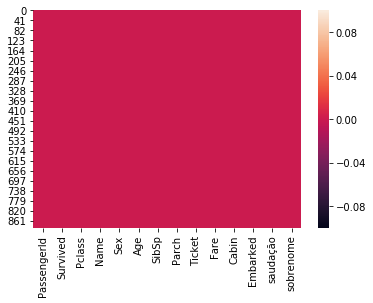

In [13]:
sns.heatmap(train.isnull())

In [14]:
#train2 = train.drop('Cabin',axis=1)

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


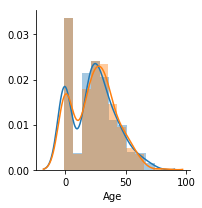

In [16]:
g = sns.FacetGrid(train, hue="Survived")
g = g.map(sns.distplot, "Age")

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


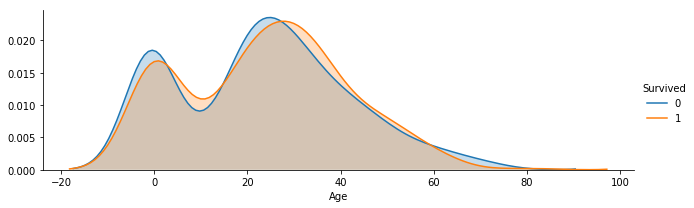

In [22]:
idade= sns.FacetGrid(train, hue="Survived", aspect=3)
idade.map(sns.kdeplot, "Age", shade=True).add_legend()
# idade.set(xlim=(0, 85))

In [42]:
from sklearn.preprocessing import LabelEncoder
labelDic = {}
for colum in train:
    if train[colum].dtype == object:
        print(colum)
        labelDic[colum] = LabelEncoder()
        concat = pd.concat([train[colum],test[colum]]).astype(str)
        labelDic[colum].fit(concat)
        train[colum] = labelDic[colum].transform(train[colum].astype(str))

Name
Sex
Cabin
Embarked
saudação
sobrenome


In [43]:
# for colum in train:
#     if train[colum].dtype == object:
#         train[colum] = train[colum].astype('category').cat.codes

** Sem Nan **

In [44]:
train2 = train

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


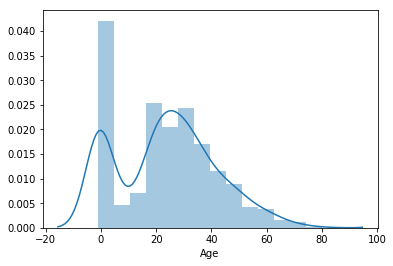

In [45]:
sns.distplot(train2['Age'])

In [46]:
y = train2['Survived']
x = train2.drop(['Survived','Name','Cabin'],axis=1)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null int32
Fare           891 non-null float64
Embarked       891 non-null int64
saudação       891 non-null int64
sobrenome      891 non-null int64
dtypes: float64(2), int32(1), int64(8)
memory usage: 73.2 KB


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
svm = SVC()
mlp = MLPClassifier()
knn =  KNeighborsClassifier()

In [53]:
DT.fit(xTreino,yTreino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
RF.fit(xTreino,yTreino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
svm.fit(xTreino,yTreino)
mlp.fit(xTreino,yTreino)
knn.fit(xTreino,yTreino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
preditosdt = DT.predict(xTeste)
preditosrf = RF.predict(xTeste)
preditosSvm = svm.predict(xTeste)
preditosMlp = mlp.predict(xTeste)
preditosKnn = knn.predict(xTeste)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(preditosKnn,yTeste))

             precision    recall  f1-score   support

          0       0.76      0.71      0.73       146
          1       0.51      0.57      0.54        77

avg / total       0.67      0.66      0.67       223



In [59]:
from sklearn.metrics import accuracy_score,recall_score
# TEste Knn Vizinho
for i in range(1,20):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTreino,yTreino)
    preditosKnn = knn.predict(xTeste)
    accuracy = accuracy_score(preditosKnn,yTeste)
    recall = recall_score(preditosKnn,yTeste)
    print("{} - Ac:{:.2f} Recall:{:.2f}".format(i,accuracy,recall))

1 - Ac:0.64 Recall:0.53
2 - Ac:0.63 Recall:0.54
3 - Ac:0.69 Recall:0.61
4 - Ac:0.67 Recall:0.62
5 - Ac:0.66 Recall:0.57
6 - Ac:0.68 Recall:0.63
7 - Ac:0.70 Recall:0.62
8 - Ac:0.67 Recall:0.62
9 - Ac:0.70 Recall:0.64
10 - Ac:0.68 Recall:0.62
11 - Ac:0.67 Recall:0.59
12 - Ac:0.68 Recall:0.62
13 - Ac:0.68 Recall:0.59
14 - Ac:0.69 Recall:0.63
15 - Ac:0.69 Recall:0.61
16 - Ac:0.69 Recall:0.65
17 - Ac:0.71 Recall:0.64
18 - Ac:0.70 Recall:0.65
19 - Ac:0.69 Recall:0.60


In [60]:
print(classification_report(preditosdt,yTeste))

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       126
          1       0.76      0.67      0.71        97

avg / total       0.76      0.76      0.76       223



In [61]:
print(classification_report(preditosrf,yTeste))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86       134
          1       0.80      0.78      0.79        89

avg / total       0.83      0.83      0.83       223



In [62]:
print(classification_report(preditosSvm,yTeste))

             precision    recall  f1-score   support

          0       1.00      0.61      0.76       223
          1       0.00      0.00      0.00         0

avg / total       1.00      0.61      0.76       223



C:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [63]:
print(classification_report(preditosMlp,yTeste))

             precision    recall  f1-score   support

          0       0.83      0.59      0.69       194
          1       0.07      0.21      0.10        29

avg / total       0.73      0.54      0.61       223



In [64]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [65]:
grid = GridSearchCV(SVC(),{'C':[100000,10000,1000,100,10,1],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]},verbose=2)
grid.fit(xTreino,yTreino)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] C=100000, gamma=1 ...............................................
[CV] ...................................... C=100000, gamma=1 -   0.0s
[CV] C=100000, gamma=1 ...............................................
[CV] ...................................... C=100000, gamma=1 -   0.0s
[CV] C=100000, gamma=1 ...............................................
[CV] ...................................... C=100000, gamma=1 -   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] .................................... C=100000, gamma=0.1 -   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] .................................... C=100000, gamma=0.1 -   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] .................................... C=100000, gamma=0.1 -   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ..........

[CV] .................................... C=1000, gamma=1e-06 -   0.0s
[CV] C=1000, gamma=1e-06 .............................................
[CV] .................................... C=1000, gamma=1e-06 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................................... C=100, gamma=1 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................................... C=100, gamma=1 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................................... C=100, gamma=1 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................................... C=100, gamma=0.1 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................................... C=100, gamma=0.1 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[CV] ...................................... C=1, gamma=0.0001 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................................... C=1, gamma=1e-05 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................................... C=1, gamma=1e-05 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................................... C=1, gamma=1e-05 -   0.0s
[CV] C=1, gamma=1e-06 ................................................
[CV] ....................................... C=1, gamma=1e-06 -   0.0s
[CV] C=1, gamma=1e-06 ................................................
[CV] ....................................... C=1, gamma=1e-06 -   0.0s
[CV] C=1, gamma=1e-06 ................................................
[CV] ....................................... C=1, gamma=1e-06 -   0.0s


[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    5.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [66]:
preditosGrid = grid.predict(xTeste)

In [67]:
print(classification_report(preditosGrid,yTeste))

             precision    recall  f1-score   support

          0       0.82      0.70      0.76       161
          1       0.44      0.61      0.51        62

avg / total       0.72      0.68      0.69       223



In [68]:
grid.best_params_

{'C': 1, 'gamma': 1e-06}

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
naiveB = GaussianNB()
naiveB.fit(xTreino,yTreino)

GaussianNB(priors=None)

In [71]:
preditNB = naiveB.predict(xTeste)

In [72]:
print(classification_report(preditNB,yTeste))

             precision    recall  f1-score   support

          0       0.91      0.66      0.77       188
          1       0.27      0.66      0.38        35

avg / total       0.81      0.66      0.71       223



** Normalizando os dados **

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
# norm = StandardScaler()
# norm.fit(x)
# xNorm = norm.transform(x)

In [75]:
# xTreino,xTeste,yTreino,yTeste = train_test_split(xNorm,y)

In [76]:
RF.fit(xTreino,yTreino)
naiveB.fit(xTreino,yTreino)

GaussianNB(priors=None)

In [77]:
preditRf = RF.predict(xTeste)
preditNb = naiveB.predict(xTeste)

In [78]:
print(classification_report(preditNB,yTeste))

             precision    recall  f1-score   support

          0       0.91      0.66      0.77       188
          1       0.27      0.66      0.38        35

avg / total       0.81      0.66      0.71       223



In [79]:
print(classification_report(preditRf,yTeste))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87       134
          1       0.81      0.79      0.80        89

avg / total       0.84      0.84      0.84       223



** Predizendo teste **

In [80]:
RF.fit(x,y)
naiveB.fit(x,y)

GaussianNB(priors=None)

In [81]:
# test = pd.read_csv('test.csv')

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null int32
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
saudação       418 non-null object
sobrenome      418 non-null object
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 40.9+ KB


In [83]:
# norm = StandardScaler()
# norm.fit(x)
# xNorm = norm.transform(x)

In [84]:
#Retirando comprimento 
# def nomeSplit(name):
#     split = name.replace(',',' ').split(' ')
#     for item in split:
#         if '.' in item:
#             return item
# test['saudação'] = test['Name'].apply(nomeSplit)

In [85]:
#Retirando sobrenome 
# def sobrenome(name):
#     split = name.split(',')
#     return split[0]
# test['sobrenome'] = test['Name'].apply(sobrenome)

In [86]:
x = test.drop(['Name','Cabin'],axis=1)

In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null object
saudação       418 non-null object
sobrenome      418 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 34.4+ KB


In [88]:
# test = test.fillna(-1)
# for colum in test:
#     if test[colum].dtype == object:
#         test[colum] = test[colum].astype('category').cat.codes

In [89]:
for colum in x:
    if x[colum].dtype == object:
#         labelDic[colum].fit(test[colum].astype(str))
        x[colum] = labelDic[colum].transform(x[colum].astype(str))

In [90]:
# for colum in x:
#     if x[colum].dtype == object:
#         x[colum] = x[colum].astype('category').cat.codes

In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int64
saudação       418 non-null int64
sobrenome      418 non-null int64
dtypes: float64(2), int32(1), int64(8)
memory usage: 34.4 KB


In [92]:
preditos = RF.predict(x)
saida = pd.DataFrame(preditos,index=test.PassengerId,columns=['Survived'])

In [93]:
saida.to_csv('saida.csv')